# Monte Carlo Simulations - Lab

## Introduction

In order to calculate the precise probability of an event occurring, one needs to know the number of occurrences and the number of possible outcomes. If there are a large number of variables, these sample spaces can explode very quickly. Often, these spaces are so large that analyzing all possible outcomes is not  possible. As an alternative, these large sets can be approximated using Monte Carlo simulations. In this lab, you will combine ideas from the previous lessons and labs in order to conduct a Monte Carlo simulation of a permutation test that would otherwise be infeasible to compute.


## Objectives 

You will be able to:
* Understand permutation testing
* Understand and conduct Monte Carlo simulations

## Exploding Sample Sizes

As we discussed in the previous lecture, permutation test sizes can quickly explode as our original sample sizes grow. To demonstrate this, Create a graph to show how the number of permutations increases as we increase just one of the sample sizes. Assume that our first sample is of 25 individuals. From there, plot a graph of how the permutation test sample size increases drastically as our second sample increases from 10 to 200 individuals. (Assume that every new person has a unique blood pressure; a stretch of an assumption, but greatly simplifies our calculations for now.)

In [1]:
# Your code here
from scipy.special import comb
comb(3,2)

3.0

In [2]:
import math
# Equation for combinations:   n!/(n-k)! * k!
#                              3!/(3-2)! * 2!
n=3
k=2
math.factorial(n) / math.factorial(n-k) * math.factorial(k)

12.0

In [3]:
sample_1 = 25
sample_2 = 10
comb(35,10)

183579396.0

In [9]:
comb_35_10 = [print(comb(25 +x,x)) for x in range(10,201)] # Starting with 10 - 200, print the comb from 25.

183579396.0
600805296.0
1852482996.0
5414950296.0
15084504396.0
40225345056.0
103077446706.0
254661927156.0
608359048206.0
1408831480056.0
3169870830126.001
6943526580276.001
14833897694226.0
30957699535775.996
63205303218876.016
126410606437752.05
247959266474052.0
477551179875952.06
903936161908052.2
1683191473897752.8
3085851035479212.0
5574440580220512.0
9929472283517788.0
1.7451799771031264e+16
3.028400548502483e+16
5.1915437974328296e+16
8.796782545650074e+16
1.4740554535954176e+17
2.4438287783292445e+17
4.01038568751466e+17
6.516876742211318e+17
1.0490582072827974e+18
1.6734976163797012e+18
2.646461346833016e+18
4.1501325666245023e+18
6.455761770304783e+18
9.96432794981825e+18
1.5264502391210936e+19
2.321476405329997e+19
3.5059031427432604e+19
5.25885471411489e+19
7.836724672014346e+19
1.1604380764328937e+20
1.707814527580485e+20
2.4984694014603392e+20
3.634137311215038e+20
5.2565200394360377e+20
7.562011284802722e+20
1.0821498907562514e+21
1.5406879800597485e+21
2.1826413050846

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [10]:
comb_35_10

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [12]:
comb_35_10_list = []
for x in range(10, 201):
    comb_35_10_list.append(comb(25+x,x))

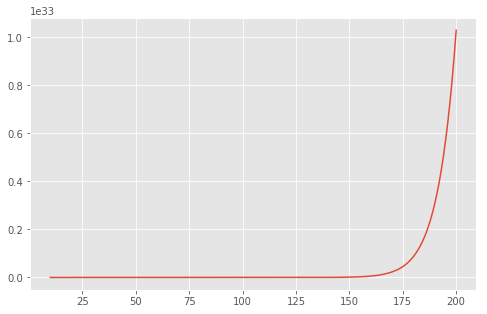

In [14]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(10,201), comb_35_10_list);

## Creating the Monte Carlo Simulation

Let's expand upon our blood pressure example from the preceding lab. Even with our previous sample sizes of a sample of 14 and a sample of 12, we had a total of over 9 million possible outcomes. As you can see from the graph above, this quantity continues to rapidly increase. As a result, it is often impractical or impossible to calculate all possible variations. Instead, use a Monte Carlo Simulation to sample from the sample space in order to emulate a permutation test. While a precise simulation of a permutation test would record which ordered combinations we have already simulate, doing so greatly reduces the speed of the process. Below is the complete samples of two populations blood pressure.  
  
Write a Monte Carlo simulation to sample from the permutation space. Be sure to not allow replacement so that no cases are repeated. Calculate the p-value after `10, 100, 500, 1000, 10**4, 10**5, 10**6, 2*10**6 and 5*10**6` iterations. Graph these to show how the p-value stabilizes and converges after a large number of iterations.
 

In [5]:
a = [109.6927759 , 120.27296943, 103.54012038, 114.16555857,
       122.93336175, 110.9271756 , 114.77443758, 116.34159338,
       130.72888419, 116.04552895, 114.8313492 , 117.52704641,
       109.06597142, 117.0317262 , 114.34876391, 111.32151926,
       108.90594481, 110.95040527,  99.15890727, 117.93581615,
       106.35644209, 112.88102458, 103.87574946, 111.88394265,
       115.42450119, 124.02872282, 116.19121625, 115.59471365,
       112.66413025, 118.30562665, 132.31196515, 117.99000948]
b = [123.98967482, 141.11969004, 117.00293412, 121.6419775 ,
       123.2703033 , 123.76944385, 105.95249634, 114.87114479,
       110.50162354, 121.31836918, 124.9483451 , 126.04639783,
       119.71433463, 117.49416398, 129.47657837, 115.57798929,
       117.36035264, 130.92919224, 104.43218778, 119.97610071,
       115.67085089, 113.77487389, 114.02470379, 116.64660978,
       117.3023355 , 116.30944159, 123.66560428, 117.87222118,
       128.8445079 , 111.7976685 , 117.25730744, 111.62121119,
       110.12277446, 112.7150916 , 129.21006268, 125.97287311,
       130.6878082 , 140.60768727, 121.95433026, 123.11996767,
       129.93260914, 121.01049611, 129.23680238]

In [6]:
#Your code here
# ⏰ This cell may take several minutes to run

In [15]:
len(a), len(b)

(32, 43)

In [16]:
# Find comb/permutations using the sample lens -- That's a lot!
comb(32+43, 32)

1.5606061216122654e+21

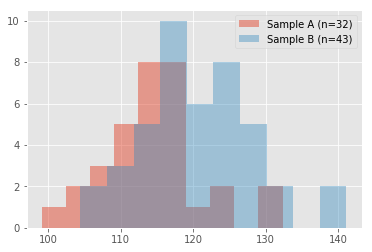

In [22]:
plt.hist(a, alpha=.5, label = "Sample A (n=32)")
plt.hist(b, alpha=.4, label = "Sample B (n=43)")
plt.legend();

In [24]:
# Find mean difference between sample(a and b)
import numpy as np
mean_diff = np.mean(a) - np.mean(b)
print(f"mean_diff: {mean_diff}")

mean_diff: -6.043384265966566


In [ ]:
import pandas as pd

combine_samples = a + b
len(a), len(b), len(combine_samples)

In [30]:
# Combine data in samples (a and b) using pandas

df = pd.DataFrame({"all_data": a + b})
df.shape

(75, 1)

In [35]:
# Create resample_a based on the original len of sample(a)
resample_a = df.sample(replace=False, random_state=33, n=len(a))
resample_a.shape

(32, 1)

In [36]:
# To get the original len of sample b - remove sample a data from combined df -- and what is left is sample b data

resample_b = df.drop(resample_a.index, axis=0) # 0 or 'index'/row
resample_b.shape

(43, 1)

In [40]:
print(resample_a.head())
resample_mean_diff = np.mean(resample_a["all_data"]) - np.mean(resample_b["all_data"])
print(f"resample_mean_diff: {resample_mean_diff}")

      all_data
51  119.976101
68  130.687808
6   114.774438
0   109.692776
2   103.540120
resample_mean_diff: 1.9687283439535008



Starting 10 Samples


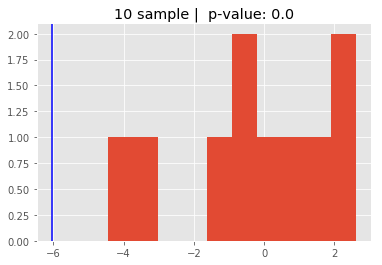

Time to Complete: 0.27

Starting 20 Samples


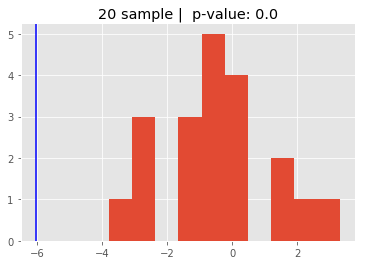

Time to Complete: 0.23

Starting 100 Samples


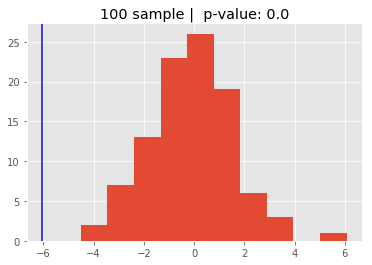

Time to Complete: 0.37

Starting 1000 Samples


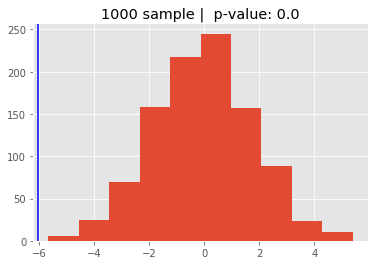

Time to Complete: 1.98


In [64]:
import time

for x in [10,20, 100, 1000]:
    ts = time.time()
    print(f"\nStarting {x} Samples")
    mean_diff = np.mean(a) - np.mean(b)
    
    sampl_diffs = []
    counter = 0
    for i in range(x):
        resample_a = df.sample(replace=False, random_state=None, n=len(a))
        resample_b = df.drop(resample_a.index, axis=0) # 0 or 'index'/row
        resample_mean_diff = np.mean(resample_a["all_data"]) - np.mean(resample_b["all_data"])
        sampl_diffs.append(resample_mean_diff)
        if resample_mean_diff < mean_diff: # Count num of times resampl < org sampl
            counter += 1  # This will be used to calc the p-value

    plt.hist(sampl_diffs)
    plt.axvline(mean_diff, color="blue");
    plt.title(f"{x} sample |  p-value: {counter/x}")
    plt.show();
    
    te = time.time()
    print(f"Time to Complete: {np.round(te-ts, 2)}")

## Summary

In this lab you simulated a permutation test and observed both how sample sizes can explode rapidly and how p-values will converge over time in a simulation.